In [4]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


clicks = pd.read_csv('C:\Datos\clicks.csv.gzip', compression='gzip')
clicks

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525
5,5,NaN,4,2019-03-07T18:02:25.833Z,6333597102633388268,1.209638,1.064208,False,27.0,dhc5iaRvlrI9OgkXDWnMRrAY47xWozY,3.025219e+18,NaN,1.774085e+18,392184377613098015,1.0,NaN,0.606,0.459,1891515180541284343,7925959310979071406
6,3,NaN,1,2019-03-12T15:17:04.453Z,6333597102633388268,1.209638,1.064208,False,27.0,cOm-_s2_6NkoDWYNu_QaMk-v4sf34h4,3.378640e+18,3.032809e+17,4.566454e+18,2733035977666442898,1.0,NaN,NaN,NaN,1891515180541284343,1709687652740629839
7,1,NaN,2,2019-03-06T19:15:47.249Z,6333597102633388268,1.205393,1.077238,False,NaN,MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,NaN,NaN,NaN,8930605132947907029,NaN,NaN,NaN,NaN,1891515180541284343,2127839020694198991
8,3,NaN,0,2019-03-07T23:11:01.934Z,6333597102633388268,1.205058,1.077332,False,19.0,1wsFgNNvk6PT1QSSIdmmwmqp0E3k7io,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,3.129,0.889,0.977,1891515180541284343,5073558237453939035
9,3,NaN,1,2019-03-07T23:06:30.642Z,6333597102633388268,1.205689,1.070234,False,18.0,ZLZz1XHsA5Xkuq_TXNfT49j_H4mfTwg,3.378640e+18,NaN,4.566454e+18,2733035977666442898,1.0,1.707,0.466,0.985,1891515180541284343,70349377423764005


In [5]:
clicks_Reduced = clicks[['advertiser_id', 'ref_hash']]
clicks_Reduced['cantidad']=1
clicks_Reduced.dtypes
clicks_Reduced_agrupado = clicks_Reduced.groupby(('advertiser_id'))['cantidad'].sum()
clicks_Reduced_agrupado = clicks_Reduced_agrupado.to_frame()

#Resetea los indices 
clicks_Reduced_agrupado = clicks_Reduced_agrupado.reset_index()


# Muestra cada advertiser_id con su correspondiente cantidad de clicks ordenados de mayor a menor
clicks_Reduced_agrupado = clicks_Reduced_agrupado.sort_values(by='cantidad', ascending=False)
clicks_Reduced_agrupado

c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,advertiser_id,cantidad
3,3,26263
0,0,70
2,2,12
1,1,2
5,7,2
4,5,1
6,8,1


Text(0.5, 1.0, 'Cantidad de Clicks por cada Cliente de Jampp')

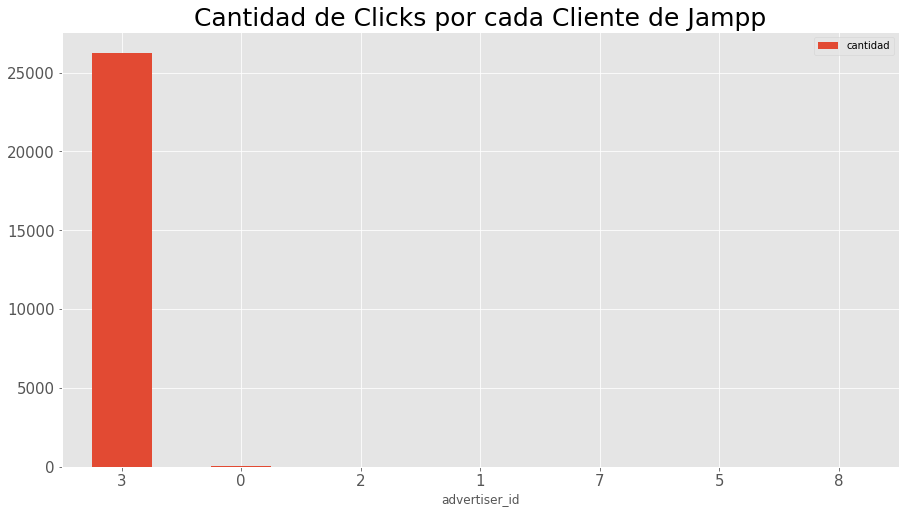

In [6]:
#LO GRAFICO
plt.rcParams['figure.figsize'] = (15, 8)

#plt.suptitle('Cantidad de Clicks para cada Cliente de Jampp', fontsize=20)
plt.style.use('ggplot')
ax = clicks_Reduced_agrupado.plot.bar(x='advertiser_id', y='cantidad', rot=0, fontsize = 15)
ax.set_title('Cantidad de Clicks por cada Cliente de Jampp',fontsize= 25)


In [7]:
#CARGO EL ARCHIVO CON LOS INSTALLS

installs = pd.read_csv('C:\Datos\installs.csv.gzip', compression='gzip')
installs

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18
5,2019-03-10 22:24:57.545,0,1891515180541284343,8355110941557237501,NaN,False,False,6333597102633388268,1.083369e+18,7.876612e+18,NaN,NaN,NaN,NaN,NaN,NaN,685400811232710215,NaN
6,2019-03-11 03:47:22.802,0,1891515180541284343,4306303321567254439,NaN,False,True,6333597102633388268,3.083059e+17,9.179743e+18,HasOffers Mobile AppTracking v1.0,NaN,b3f7905b-5058-4eca-853c-b3c670d7ac54,Open,NaN,NaN,7462893331703692427,4.073835e+18
7,2019-03-11 21:21:05.986,0,1891515180541284343,1670430602051291592,NaN,False,False,6333597102633388268,1.083369e+18,7.551685e+17,NaN,NaN,NaN,NaN,NaN,NaN,5634136297886425939,NaN
8,2019-03-11 21:21:05.855,0,1891515180541284343,1670430602051291592,NaN,False,True,6333597102633388268,1.083369e+18,7.551685e+17,HasOffers Mobile AppTracking v1.0,NaN,28a6e6a0-ba70-46a2-a63f-1e74b0dd5235,Open,NaN,NaN,5634136297886425939,3.301378e+18
9,2019-03-13 08:29:31.875,2,1891515180541284343,5651666841804012468,NaN,False,False,6333597102633388268,3.083059e+17,8.656854e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 22; SM-J200M B...,NaN,NaN,True,NaN,5997848429649592955,9.028383e+18


In [8]:
installs_reduced = installs[['application_id', 'ref_hash']]
installs_reduced['cantidad_instalaciones']=1
installs_reduced.dtypes
installs_reduced_agrupado = installs_reduced.groupby(('application_id'))['cantidad_instalaciones'].sum()
installs_reduced_agrupado = installs_reduced_agrupado.to_frame()

#Resetea los indices 
installs_reduced_agrupado = installs_reduced_agrupado.reset_index()


# Muestra cada aplicacion con su correspondiente cantidad de installs ordenados de mayor a menor
installs_reduced_agrupado = installs_reduced_agrupado.sort_values(by='cantidad_instalaciones', ascending=False)
installs_reduced_agrupado

c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,application_id,cantidad_instalaciones
7,7,947
9,9,731
10,10,389
15,16,362
8,8,328
2,2,174
25,29,97
19,20,95
6,6,35
1,1,34


Text(0.5, 1.0, 'Cantidad de instalaciones para cada aplicacion')

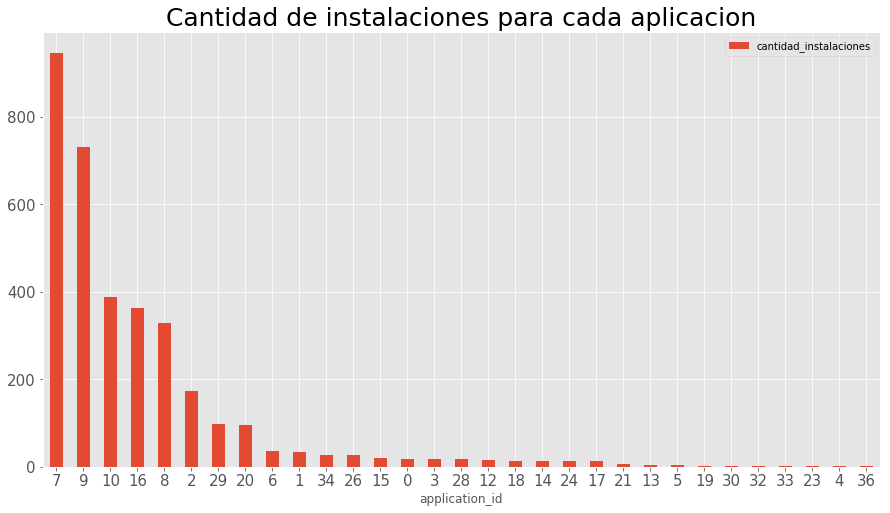

In [9]:
#LO GRAFICO

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
ax = installs_reduced_agrupado.plot.bar(x='application_id', y='cantidad_instalaciones', rot=0, fontsize = 15)
ax.set_title('Cantidad de instalaciones para cada aplicacion',fontsize= 25)

In [13]:
clicks_refhash = clicks[['ref_hash', 'advertiser_id']]
clicks_refhash['cantidad']=1
clicks_refhash.dtypes
clicks_refhash = clicks_refhash.groupby(('ref_hash', 'advertiser_id'))['cantidad'].sum()
clicks_refhash = clicks_refhash.to_frame()

#Resetea los indices 
clicks_refhash = clicks_refhash.reset_index()



#CRUZO CLICKS CON INSTALLS TOMANDO EL DATO REF_HASH
clicks_installs = pd.merge(clicks_refhash, installs, on='ref_hash', how='inner')
clicks_installs = clicks_installs[['advertiser_id', 'application_id', 'ref_hash']]

#Esta tabla contiene el id de aplicacion que fue instalada, el id del advertiser del cliente de Jampp y id del celular
clicks_installs

# SEGUN ESTO, SOLO EL ADVERTISER_ID = 3 LOGRO OBTENER 7 INSTALACIONES CORRESPONDIENTES A 2 APLICACIONES

c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  after removing the cwd from sys.path.


,advertiser_id,application_id,ref_hash
0,3,7,582930240149217282
1,3,8,1254317779988816837
2,3,7,2369915544093215150
3,3,7,3685364020547088390
4,3,7,7190737170444985036
5,3,7,7759178785240189555
6,3,7,8187571300120427764


In [14]:
clicks_installs_final = clicks_installs[['advertiser_id', 'application_id']]
clicks_installs_final['cantidad_instalaciones']=1
clicks_installs_final.dtypes
clicks_installs_final = clicks_installs_final.groupby(('advertiser_id', 'application_id'))['cantidad_instalaciones'].sum()
clicks_installs_final = clicks_installs_final.to_frame()

#Resetea los indices 
clicks_installs_final = clicks_installs_final.reset_index()


# MUESTRA LA CANT. DE INSTALACIONES POR CADA APP DEL ADVERTISER_ID = 3
clicks_installs_final = clicks_installs_final.sort_values(by='cantidad_instalaciones', ascending=False)
clicks_installs_final

c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  after removing the cwd from sys.path.


,advertiser_id,application_id,cantidad_instalaciones
0,3,7,6
1,3,8,1


In [15]:
pd.merge(clicks_installs_final, clicks_Reduced_agrupado, on='advertiser_id', how='inner') 

# SE PUEDE CONCLUIR QUE EL ADVERTISER_ID 3 LOGRO OBTENER SOLAMENTE 7 INSTALACIONES CORRESPONDIENTES A 2 APLICACIONES DE 
# lOS 26.263 CLICKS QUE HUBO EN SUS PUBLICIDADES

,advertiser_id,application_id,cantidad_instalaciones,cantidad
0,3,7,6,26263
1,3,8,1,26263
